In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import io
import os

In [2]:
df = pd.read_csv("Final_Marks_Data.csv")

In [3]:
df

,Student_ID,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
0,S1000,84,30,36,7,3,72
1,S1001,91,24,38,6,3,56
2,S1002,73,29,26,7,3,56
3,S1003,80,36,35,7,3,74
4,S1004,84,31,37,8,3,66
...,...,...,...,...,...,...,...
1995,S2995,82,31,28,6,2,52
1996,S2996,78,38,27,7,2,57
1997,S2997,78,30,33,9,2,61
1998,S2998,82,29,40,8,3,59


In [4]:
X = df.drop(['Student_ID', 'Final Exam Marks (out of 100)'], axis=1)

y = df['Final Exam Marks (out of 100)']

In [5]:
X

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours
0,84,30,36,7,3
1,91,24,38,6,3
2,73,29,26,7,3
3,80,36,35,7,3
4,84,31,37,8,3
...,...,...,...,...,...
1995,82,31,28,6,2
1996,78,38,27,7,2
1997,78,30,33,9,2
1998,82,29,40,8,3


In [6]:
y

0       72
1       56
2       56
3       74
4       66
        ..
1995    52
1996    57
1997    61
1998    59
1999    64
Name: Final Exam Marks (out of 100), Length: 2000, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# SCALING: Neural networks perform much better when inputs are standardized 
# (mean=0, std=1). This prevents gradients from exploding/vanishing.
scaler = StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled.shape

(1600, 5)

In [11]:
X_test_scaled.shape

(400, 5)

In [12]:
model = Sequential([
          Input(shape=(X_train_scaled.shape[1],)),
          Dense(64, activation='relu'),
          Dense(32, activation='relu'),
          Dropout(0.2),
          Dense(1)
])

In [13]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
          X_train_scaled,
          y_train,
          epochs=100,
          batch_size=16,
          validation_split=0.2,
          verbose=0
)

In [16]:
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Set Mean Absolute Error: {mae:.2f} Marks")
print(f"Test Set Loss (MSE): {loss:.2f}")


Test Set Mean Absolute Error: 3.90 Marks
Test Set Loss (MSE): 24.67


In [17]:
predictions = model.predict(X_test_scaled).flatten()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [18]:
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print("\nSample Predictions vs Actual:")
print(comparison)


Sample Predictions vs Actual:
     Actual  Predicted
0        64  63.012779
1        52  54.564850
2        61  64.156952
3        54  49.063435
4        37  41.362915
..      ...        ...
395      68  68.012199
396      62  61.307045
397      57  53.582325
398      54  64.131813
399      82  74.006371

[400 rows x 2 columns]


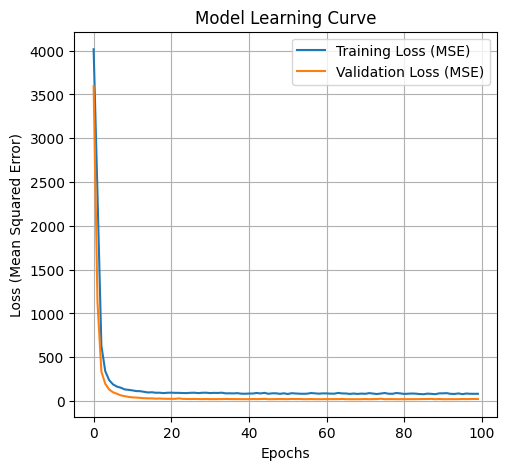

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)

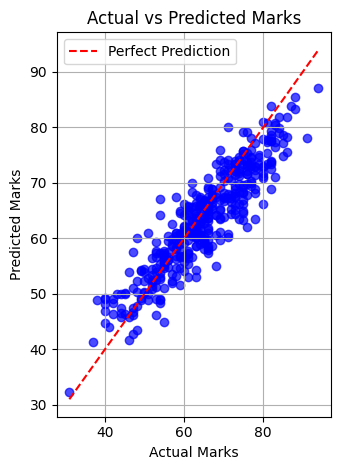

In [20]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions, alpha=0.7, color='blue')
# Draw a perfect prediction line (x=y)
limits = [min(y_test.min(), predictions.min()), max(y_test.max(), predictions.max())]
plt.plot(limits, limits, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Marks')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [22]:
# Live Prediction Demo

new_student_data = np.array([[85, 30, 32, 8, 3]])
new_student_scaled = scaler.transform(new_student_data)

c:\Users\Rayquaza\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
predicted_mark = model.predict(new_student_scaled)
print("\n" + "="*40)
print(f"Prediction for Hypothetical Student:\nInputs: {new_student_data}")
print(f"Predicted Final Exam Score: {predicted_mark[0][0]:.2f}")
print("="*40)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Prediction for Hypothetical Student:
Inputs: [[85 30 32  8  3]]
Predicted Final Exam Score: 61.83


In [28]:
loss_mse, _ = model.evaluate(X_test_scaled, y_test, verbose=0)

# Make predictions for R^2 calculation
predictions = model.predict(X_test_scaled).flatten()

# Calculate R^2 score
r2 = r2_score(y_test, predictions)

print(f"\nTest Set Mean Squared Error (MSE): {loss_mse:.2f}")
print(f"Test Set R^2 Score: {r2*100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Test Set Mean Squared Error (MSE): 24.67
Test Set R^2 Score: 80.30%
